In [1]:
import seaborn as sns
import pandas as pd
from pract2_utils import *
from sklearn.cluster import KMeans, Birch
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def obtenerResultadosKmeans(cluster, data_norm):
    results = KMeans(n_clusters=cluster, random_state=0).fit(data_norm)
    labels = results.labels_
    centroides_kmeans = results.cluster_centers_
    silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)
    print('Tamaño clusters', Counter(labels))
    print("silhouette: {:3f}".format(silhouette))
    print("calinsky: {:3f}".format(calinski))
    return centroides_kmeans
    
def obtenerResultadosBirch(cluster, thres, data_norm):
    df_data = pd.DataFrame(data_norm)
    results = Birch(n_clusters=cluster,threshold=thres).fit(data_norm)
    labels = results.labels_
    df_data.columns = atributos
    df_data['cluster'] = labels
    df_centroides = df_data.groupby('cluster').mean()
    centroides_birch = df_centroides.values

    silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)
    print('Tamaño clusters', Counter(labels))
    print("silhouette: {:3f}".format(silhouette))
    print("calinsky: {:3f}".format(calinski))
    return centroides_birch

In [2]:
accidentes = pd.read_csv('accidentes_2013.csv')


dfDia = accidentes[(accidentes.LUMINOSIDAD == 'PLENO DÍA')
                        &(accidentes.ZONA == 'ZONA URBANA')]

dfNoche = accidentes[(accidentes.LUMINOSIDAD == 'NOCHE: ILUMINACIÓN SUFICIENTE')
                        &(accidentes.ZONA == 'ZONA URBANA')]



atributos = ['TOT_VICTIMAS','TOT_MUERTOS','TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

#Datos en forma matricial
dataDia = to_matrix(dfDia, atributos)
dataNoche = to_matrix(dfNoche, atributos)

#Datos Normalizados
data_normDia = norm(dataDia)
data_normNoche = norm(dataNoche)

print("Dia", len(dfDia))
print("Noche", len(dfNoche))

Dia 37222
Noche 11148


In [3]:
clusterKmeans = 16
clusterBirch = 16
thresBirch = 0.1

In [4]:
centroides_kmeansDia = obtenerResultadosKmeans(clusterKmeans, data_normDia)

Tamaño clusters Counter({1: 16426, 2: 9255, 8: 3480, 5: 1502, 7: 1222, 11: 1107, 9: 934, 0: 900, 15: 606, 12: 393, 14: 368, 6: 323, 3: 258, 10: 241, 4: 186, 13: 21})
silhouette: 0.959066
calinsky: 57394.388150


In [5]:
centroides_kmeansNoche = obtenerResultadosKmeans(clusterKmeans, data_normNoche)

Tamaño clusters Counter({4: 4336, 1: 2751, 2: 1159, 7: 471, 3: 455, 13: 383, 8: 368, 0: 329, 11: 200, 15: 180, 14: 144, 5: 128, 6: 89, 12: 63, 10: 56, 9: 36})
silhouette: 0.934930
calinsky: 13999.900874


In [6]:
centroides_birchDia = obtenerResultadosBirch(clusterBirch,thresBirch,data_normDia)

Tamaño clusters Counter({1: 36191, 2: 675, 14: 167, 5: 111, 12: 22, 4: 18, 3: 15, 8: 13, 0: 2, 6: 2, 13: 1, 9: 1, 10: 1, 15: 1, 11: 1, 7: 1})
silhouette: 0.676717
calinsky: 1869.665169


In [7]:
centroides_birchNoche = obtenerResultadosBirch(clusterBirch,thresBirch,data_normNoche)

Tamaño clusters Counter({7: 9022, 6: 952, 3: 854, 12: 103, 0: 84, 5: 55, 2: 46, 13: 8, 4: 7, 1: 5, 15: 3, 9: 3, 14: 2, 8: 2, 11: 1, 10: 1})
silhouette: 0.530772
calinsky: 1625.067170


In [8]:
#Para la representación de las gráficas
sns.set(rc={'figure.figsize':(8,5)})

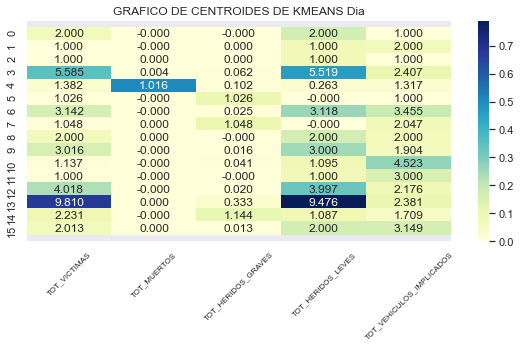

In [9]:
plt.title('GRAFICO DE CENTROIDES DE KMEANS Dia')

visualize_centroids(centroides_kmeansDia, dataDia, atributos)
plt.savefig('./imgcaso2/GraficoDiaKmeans ' + str(clusterKmeans) +'.png')

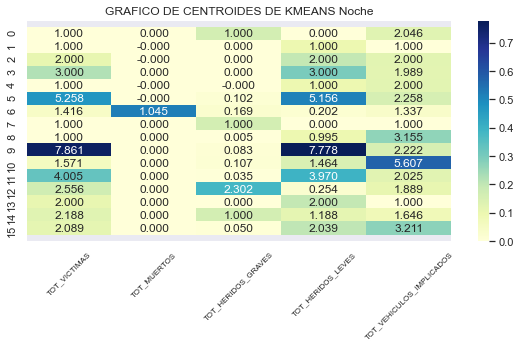

In [10]:
plt.title('GRAFICO DE CENTROIDES DE KMEANS Noche')
visualize_centroids(centroides_kmeansNoche, dataNoche, atributos)
plt.savefig('./imgcaso2/GraficoNocheKmeans ' + str(clusterKmeans) +'.png')

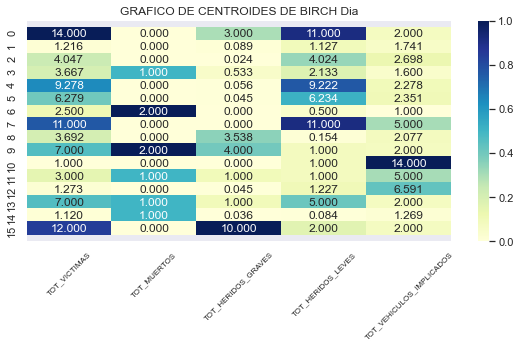

In [11]:
plt.title('GRAFICO DE CENTROIDES DE BIRCH Dia')
visualize_centroids(centroides_birchDia, dataDia, atributos)
plt.savefig('./imgcaso2/GraficoDiaBirch ' + str(clusterBirch) +'.png')

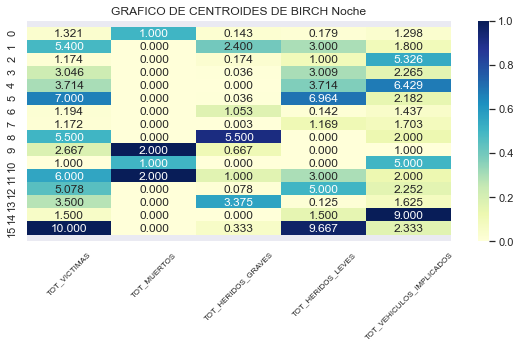

In [12]:
plt.title('GRAFICO DE CENTROIDES DE BIRCH Noche')
visualize_centroids(centroides_birchNoche, dataNoche, atributos)
plt.savefig('./imgcaso2/GraficoNocheBirch ' + str(clusterBirch) +'.png')